Jason Cain, Nathan Harms, Marissa Puzan
## Serotonin transport modeling 


Laminar flow model:

## $$ \frac{C_m}{C_o} = \sum_{n} M_n e^{- \beta^2 Gz} $$



from
$$v_z \frac{\partial C}{\partial z} = D \frac{1}{r} \frac{\partial}{\partial r} \left( r \frac{\partial C}{\partial r} \right)$$
where 

$$ Gz = \frac{D L}{V_m R^2} $$

$$ P_w^* = P_w \left( \frac{R}{D} \right) $$

$$ M_n = f( P_w^* ) $$ 

$$ \beta = f( P_w^* ) $$ 

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from collections import namedtuple

In [2]:
import laminarFlow


In [3]:
ConditionSet = namedtuple('ConditionSet', ['Concentration', 'Diffusivity', 'Permeability'])
KineticsParamers = namedtuple('ConditionSet', ['vmax1', 'Km1', 'K1', 'vmax2', 'Km2', 'K2'])


serCondition = ConditionSet(
                Concentration = .1,
                Diffusivity = 6.2424e-8,
                Permeability =7.576e-13)

trypCondition = ConditionSet(
                Concentration = .1,
                Diffusivity = 5.386e-8,
                Permeability = 6.44e-4)

kinetics = KineticsParamers(vmax1 = 0.1868167,
                            Km1 = 1.43533284,
                            K1 = 0.43680929,
                            vmax2 = 9.97704964,
                            Km2 = 2.37430847,
                            K2 = 0.25340153)

radius = 1./12
length = 25
max_velocity = 5
iterations = 1000


In [4]:
Model = laminarFlow.LaminarFlow(length, radius, max_velocity, serCondition, trypCondition, kinetics, iterations)

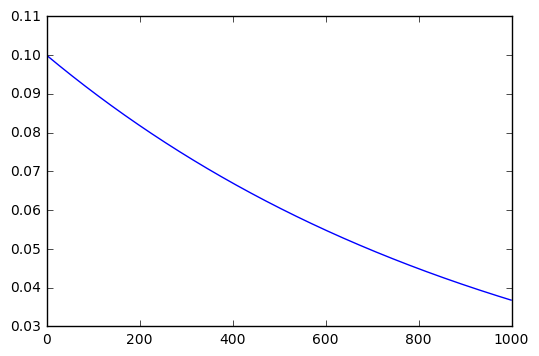

In [5]:
plt.plot(Model.serConcentration)

In [6]:
from SALib.sample.saltelli import sample as ss
from SALib.analyze.sobol import analyze as sa


In [7]:
def laminarModel(data):
    serCondition = ConditionSet(
                Concentration = data[3],
                Diffusivity = data[4],
                Permeability = data[5])

    trypCondition = ConditionSet(
                Concentration = data[6],
                Diffusivity = data[7],
                Permeability = data[8])

    
    kinetics = KineticsParamers(vmax1 = data[9],
                            Km1 = data[10],
                            K1 = data[11],
                            vmax2 = data[12],
                            Km2 = data[13],
                            K2 = data[14])

    
    iterations = 1000
    
    Model = laminarFlow.LaminarFlow(data[0],data[1],data[2],serCondition)

In [8]:


morris_problem = {
    # There are six variables
    'num_vars': 15,
    # These are their names
    'names': ['length', 'radius', 'max_velocity', 'serConc', 'serDiff', 
              'serPerm', 'tryConc', 'tryDiff', 'tryPerm','vmax1', 'Km1', 'K1', 'vmax2', 'Km2', 'K2'],
    # These are their plausible ranges over which we'll move the variables
    'bounds': [[,], # length (m)
               [,], # radius (m)
               [,], # max_velocity (m/s)
               [,], # Serotonin Concentration (mM)
               [,], # Serotonin Diffusivity 
               [,], # Serotonin Wall Permeability 
               [,], # Tryptophan Concentration
               [,], # Tryptophan Diffusivity
               [,], # Tryptophan Wall Permability
               [,], # Max rate of Tryp -> 5HTP
               [,], # Michaelus Menton Constant Tryp -> 5HTP
               [,], # Equilibrium Constant for 5HTP and Tryp
               [,], # Max rate of 5HTP -> Serotonin
               [,], # Michaelus Menton Constant 5HTP -> Serotonin
               [,], # Equilibrium Constant for 5HTP and Serotonin
              ],
    # I don't want to group any of these variables together
    'groups': None
    }

SyntaxError: invalid syntax (<ipython-input-8-9da1434ad5f9>, line 10)